<a href="https://colab.research.google.com/github/Harshithakapa1010/UMBC_690_FALL2024_/blob/main/Assignment/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10/16/2024

In [2]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

print(df.shape)
df.sample(3)

(4123, 9)


,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
3922,2012,United States,51784.418574,78.741463,313877662.0,USA,North America,High income,Not classified
3464,2010,St. Lucia,8672.215668,72.720000,170935.0,LCA,Latin America & Caribbean,Upper middle income,Blend
1962,2009,"Korea, Dem. People's Rep.",NaN,69.732000,24581509.0,PRK,East Asia & Pacific,Low income,Not classified


In [3]:
column_names_dict = {
    "GDP per capita (current US$)" : "GDP per Capita",
    "Life expectancy at birth, total (years)" : "Life Expectancy",
    "Population, total" : "Population"
}

df = df.rename(columns=column_names_dict)
df.sample(3)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
1215,2022,Eswatini,3986.886637,NaN,1201670.0,SWZ,Sub-Saharan Africa,Lower middle income,IBRD
2576,2015,Myanmar,1159.340201,65.561,51483949.0,MMR,East Asia & Pacific,Lower middle income,IDA
99,2008,Angola,4081.717497,54.633,21691522.0,AGO,Sub-Saharan Africa,Lower middle income,IBRD


In [4]:
df.sample(3).T

,3799,895,3494
Year,2022,2006,2021
Country,Turkmenistan,Cote d'Ivoire,St. Martin (French part)
GDP per Capita,8792.548504,1303.564967,20320.716879
Life Expectancy,NaN,52.355,80.379
Population,6430770.0,19394057.0,31948.0
Country Code,TKM,CIV,MAF
Region,Europe & Central Asia,Sub-Saharan Africa,Latin America & Caribbean
Income Group,Upper middle income,Lower middle income,High income
Lending Type,IBRD,IDA,Not classified


## Section One

Summary Statistics with describe() function

In [5]:
df[["Population","Life Expectancy"]].describe()

,Population,Life Expectancy
count,4.123000e+03,3777.000000
mean,3.319575e+07,71.060853
std,1.316430e+08,8.499806
min,9.791000e+03,42.125000
25%,7.436200e+05,65.351000
50%,5.872624e+06,72.765000
75%,2.148494e+07,77.529000
max,1.417173e+09,85.497561


In [6]:
df.describe()

,Year,GDP per Capita,Life Expectancy,Population
count,4123.00000,3962.000000,3777.000000,4.123000e+03
mean,2013.00000,17007.692848,71.060853,3.319575e+07
std,5.47789,25733.109164,8.499806,1.316430e+08
min,2004.00000,128.538423,42.125000,9.791000e+03
25%,2008.00000,1862.892400,65.351000,7.436200e+05
50%,2013.00000,6048.304202,72.765000,5.872624e+06
75%,2018.00000,22137.309568,77.529000,2.148494e+07
max,2022.00000,240862.182448,85.497561,1.417173e+09


In [7]:
df.describe(include="object")

,Country,Country Code,Region,Income Group,Lending Type
count,4123,4123,4123,4123,4123
unique,217,217,7,5,4
top,Afghanistan,AFG,Europe & Central Asia,High income,Not classified
freq,19,19,1102,1558,1387


In [8]:
df.describe(include="object").T

,count,unique,top,freq
Country,4123,217,Afghanistan,19
Country Code,4123,217,AFG,19
Region,4123,7,Europe & Central Asia,1102
Income Group,4123,5,High income,1558
Lending Type,4123,4,Not classified,1387


## Section Two

Compute quartiles and transform a numerical column into a categorical column based on the quartiles.

In [9]:
def assign_quartile(gdp):
    if gdp <= 1862.89:
        quartile = "1st Quartile (<=25%)"
    elif gdp > 1862.89 and gdp <= 6048.30:
        quartile = "2nd Quartile (25-50%)"
    elif gdp > 6048.30 and gdp <= 22137.31:
        quartile = "3rd Quartile (50-75%)"
    else:
        quartile = "4th Quartile (>75%)"
    return quartile


hungary = assign_quartile(14294.25)
hungary

'3rd Quartile (50-75%)'

In [10]:
df_usa = df[df["Country Code"] == "USA"]
df_usa

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
3914,2004,United States,41724.631629,77.487805,292805298.0,USA,North America,High income,Not classified
3915,2005,United States,44123.407068,77.487805,295516599.0,USA,North America,High income,Not classified
3916,2006,United States,46302.000880,77.687805,298379912.0,USA,North America,High income,Not classified
3917,2007,United States,48050.223777,77.987805,301231207.0,USA,North America,High income,Not classified
3918,2008,United States,48570.045980,78.039024,304093966.0,USA,North America,High income,Not classified
3919,2009,United States,47194.943355,78.390244,306771529.0,USA,North America,High income,Not classified
3920,2010,United States,48650.643128,78.541463,309327143.0,USA,North America,High income,Not classified
3921,2011,United States,50065.966504,78.641463,311583481.0,USA,North America,High income,Not classified
3922,2012,United States,51784.418574,78.741463,313877662.0,USA,North America,High income,Not classified
3923,2013,United States,53291.127689,78.741463,316059947.0,USA,North America,High income,Not classified


In [11]:
assign_quartile(76329.58)

'4th Quartile (>75%)'

In [12]:
df_2020 = df[df["Year"] == 2020]
print(df_2020.shape[0])
print(f"There are {df_2020.shape[0]} countries in the 2020 dataset")
df_2020.sample(3)

217
There are 217 countries in the 2020 dataset


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type
225,2020,Austria,48789.497850,81.192683,8916864.0,AUT,Europe & Central Asia,High income,Not classified
3512,2020,St. Vincent and the Grenadines,8306.360493,72.126000,104632.0,VCT,Latin America & Caribbean,Upper middle income,Blend
2372,2020,Marshall Islands,5545.600267,64.977000,43413.0,MHL,East Asia & Pacific,Upper middle income,IDA


In [13]:
# Tuple
df_2020.shape

(217, 9)

## In-class Exercise

Create a new column call "GDP Quartile" in the df_2020 dataframe and assign each country the quartile it belongs to by applying the assign_quartile() function.


In [14]:
df_2020["GDP Quartile"] = df_2020["GDP per Capita"].apply(assign_quartile)

print(df_2020.shape[0])
print(df_2020["GDP Quartile"].value_counts())

217
GDP Quartile
4th Quartile (>75%)      61
2nd Quartile (25-50%)    58
3rd Quartile (50-75%)    54
1st Quartile (<=25%)     44
Name: count, dtype: int64


In [15]:
df_2020.sample(10)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile
3227,2020,Seychelles,12020.021064,77.236585,98462.0,SYC,Sub-Saharan Africa,High income,IBRD,3rd Quartile (50-75%)
4006,2020,"Venezuela, RB",NaN,71.095000,28490453.0,VEN,Latin America & Caribbean,Not classified,IBRD,4th Quartile (>75%)
2999,2020,Portugal,22242.406418,80.975610,10297081.0,PRT,Europe & Central Asia,High income,Not classified,4th Quartile (>75%)
2524,2020,Montenegro,7677.371321,75.931707,621306.0,MNE,Europe & Central Asia,Upper middle income,IBRD,3rd Quartile (50-75%)
2011,2020,Kosovo,4310.934002,76.567000,1790133.0,XKX,Europe & Central Asia,Upper middle income,IDA,2nd Quartile (25-50%)
2733,2020,Niger,564.841662,61.451000,24333639.0,NER,Sub-Saharan Africa,Low income,IDA,1st Quartile (<=25%)
1745,2020,"Iran, Islamic Rep.",2746.419483,74.832000,87290193.0,IRN,Middle East & North Africa,Lower middle income,IBRD,2nd Quartile (25-50%)
2638,2020,Nepal,1139.189892,69.246000,29348627.0,NPL,South Asia,Lower middle income,IDA,1st Quartile (<=25%)
2600,2020,Namibia,4252.041720,62.829000,2489098.0,NAM,Sub-Saharan Africa,Upper middle income,IBRD,2nd Quartile (25-50%)
1137,2020,El Salvador,3961.726633,71.061000,6292731.0,SLV,Latin America & Caribbean,Upper middle income,IBRD,2nd Quartile (25-50%)


In [16]:
df_4th = df_2020[df_2020["GDP Quartile"] == "4th Quartile (>75%)"]
df_4th.shape

(61, 10)

In [17]:
", ".join(list(df_4th["Country"]))

"Andorra, Aruba, Australia, Austria, Bahamas, The, Bahrain, Belgium, Bermuda, British Virgin Islands, Brunei Darussalam, Canada, Cayman Islands, Channel Islands, Cyprus, Czechia, Denmark, Eritrea, Estonia, Faroe Islands, Finland, France, Germany, Gibraltar, Greenland, Guam, Hong Kong SAR, China, Iceland, Ireland, Isle of Man, Israel, Italy, Japan, Korea, Dem. People's Rep., Korea, Rep., Kuwait, Liechtenstein, Luxembourg, Macao SAR, China, Malta, Monaco, Netherlands, New Caledonia, New Zealand, Norway, Portugal, Puerto Rico, Qatar, San Marino, Singapore, Sint Maarten (Dutch part), Slovenia, South Sudan, Spain, St. Martin (French part), Sweden, Switzerland, United Arab Emirates, United Kingdom, United States, Venezuela, RB, Virgin Islands (U.S.)"

In [18]:


quartile_groups = df_2020.groupby("GDP Quartile")["Country"].apply(list)


for quartile, countries in quartile_groups.items():
  print(f"{quartile}:")
  for country in countries:
      print(f"  - {country}")
  print("\n")

1st Quartile (<=25%):
  - Afghanistan
  - Angola
  - Benin
  - Burkina Faso
  - Burundi
  - Cambodia
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo, Dem. Rep.
  - Ethiopia
  - Gambia, The
  - Guinea
  - Guinea-Bissau
  - Haiti
  - Kiribati
  - Kyrgyz Republic
  - Lesotho
  - Liberia
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nepal
  - Niger
  - Pakistan
  - Rwanda
  - Senegal
  - Sierra Leone
  - Somalia
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Tanzania
  - Timor-Leste
  - Togo
  - Uganda
  - Uzbekistan
  - Yemen, Rep.
  - Zambia
  - Zimbabwe


2nd Quartile (25-50%):
  - Albania
  - Algeria
  - Armenia
  - Azerbaijan
  - Bangladesh
  - Belize
  - Bhutan
  - Bolivia
  - Botswana
  - Cabo Verde
  - Colombia
  - Congo, Rep.
  - Cote d'Ivoire
  - Djibouti
  - Ecuador
  - Egypt, Arab Rep.
  - El Salvador
  - Eswatini
  - Fiji
  - Georgia
  - Ghana
  - Guatemala
  - Honduras
  - India
  - Indonesia
  - Iran, Islamic

In [19]:
for quartile, countries in quartile_groups.items():
  print(f"{quartile}:")
  for country in countries:
      print(f"  - {country}")
  print("\n")

1st Quartile (<=25%):
  - Afghanistan
  - Angola
  - Benin
  - Burkina Faso
  - Burundi
  - Cambodia
  - Cameroon
  - Central African Republic
  - Chad
  - Comoros
  - Congo, Dem. Rep.
  - Ethiopia
  - Gambia, The
  - Guinea
  - Guinea-Bissau
  - Haiti
  - Kiribati
  - Kyrgyz Republic
  - Lesotho
  - Liberia
  - Madagascar
  - Malawi
  - Mali
  - Mauritania
  - Mozambique
  - Myanmar
  - Nepal
  - Niger
  - Pakistan
  - Rwanda
  - Senegal
  - Sierra Leone
  - Somalia
  - Sudan
  - Syrian Arab Republic
  - Tajikistan
  - Tanzania
  - Timor-Leste
  - Togo
  - Uganda
  - Uzbekistan
  - Yemen, Rep.
  - Zambia
  - Zimbabwe


2nd Quartile (25-50%):
  - Albania
  - Algeria
  - Armenia
  - Azerbaijan
  - Bangladesh
  - Belize
  - Bhutan
  - Bolivia
  - Botswana
  - Cabo Verde
  - Colombia
  - Congo, Rep.
  - Cote d'Ivoire
  - Djibouti
  - Ecuador
  - Egypt, Arab Rep.
  - El Salvador
  - Eswatini
  - Fiji
  - Georgia
  - Ghana
  - Guatemala
  - Honduras
  - India
  - Indonesia
  - Iran, Islamic

In [20]:
df_2020 = df_2020.dropna()
df_2020["GDP (Rounded)"] = df_2020["GDP per Capita"].apply(round)
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded)
3797,2020,Turkmenistan,7330.366288,68.687000,6250438.0,TKM,Europe & Central Asia,Upper middle income,IBRD,3rd Quartile (50-75%),7330
3455,2020,St. Kitts and Nevis,18553.657137,71.627000,47642.0,KNA,Latin America & Caribbean,High income,IBRD,3rd Quartile (50-75%),18554
3569,2020,Sweden,52837.903978,82.356098,10353442.0,SWE,Europe & Central Asia,High income,Not classified,4th Quartile (>75%),52838
1555,2020,Guinea,1073.659339,59.327000,13205153.0,GIN,Sub-Saharan Africa,Lower middle income,IDA,1st Quartile (<=25%),1074
1213,2020,Eswatini,3372.904610,59.692000,1180655.0,SWZ,Sub-Saharan Africa,Lower middle income,IBRD,2nd Quartile (25-50%),3373


In [21]:
def pop_million(pop):
    return pop / 1000000


df_2020["Population (Million)"] = df_2020["Population"].apply(pop_million)

df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded),Population (Million)
3607,2020,Syrian Arab Republic,537.090235,72.140000,20772595.0,SYR,Middle East & North Africa,Low income,IDA,1st Quartile (<=25%),537,20.772595
3246,2020,Sierra Leone,493.432241,59.763000,8233970.0,SLE,Sub-Saharan Africa,Low income,IDA,1st Quartile (<=25%),493,8.233970
1669,2020,Hungary,16125.609409,75.568293,9750149.0,HUN,Europe & Central Asia,High income,Not classified,3rd Quartile (50-75%),16126,9.750149
3626,2020,Tajikistan,852.330230,67.994000,9543207.0,TJK,Europe & Central Asia,Lower middle income,IDA,1st Quartile (<=25%),852,9.543207
814,2020,Colombia,5304.289129,74.769000,50930662.0,COL,Latin America & Caribbean,Upper middle income,IBRD,2nd Quartile (25-50%),5304,50.930662


In [22]:
df_2020["Population2 (Million)"] = df_2020["Population"].apply(lambda pop : pop / 1000000)
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP Quartile,GDP (Rounded),Population (Million),Population2 (Million)
3265,2020,Singapore,61273.991659,84.465854,5.685807e+06,SGP,East Asia & Pacific,High income,Not classified,4th Quartile (>75%),61274,5.685807,5.685807
472,2020,Bosnia and Herzegovina,6095.104237,76.225000,3.318407e+06,BIH,Europe & Central Asia,Upper middle income,IBRD,3rd Quartile (50-75%),6095,3.318407,3.318407
3531,2020,Sudan,608.332520,65.614000,4.444049e+07,SDN,Sub-Saharan Africa,Low income,IDA,1st Quartile (<=25%),608,44.440486,44.440486
4082,2020,"Yemen, Rep.",578.512010,64.650000,3.228405e+07,YEM,Middle East & North Africa,Low income,IDA,1st Quartile (<=25%),579,32.284046,32.284046
1707,2020,India,1913.219733,70.150000,1.396387e+09,IND,South Asia,Lower middle income,IBRD,2nd Quartile (25-50%),1913,1396.387127,1396.387127


## Homework Question 1

Save the summary statistics of all numerical columns and all categorical columns to only one Excel spreadsheet file with two worksheets, one for numerical and one for categorical columns.

In [23]:
# Makes an Excel workbook with sheets, 'Numerical' and 'Categorical', and they
# contain numerical and categorical summary statistics, respectively.
with pd.ExcelWriter('summary_stats.xlsx') as writer:
    df.describe().to_excel(writer, sheet_name='Numerical')
    df.describe(include='object').to_excel(writer, sheet_name='Categorical')

## Homework Question 2

Create a new column that is the GDP per Capita rounded to 2 decimal points by using the Python's build function "round"
Hint: apply the round function/method and provide a parameter 2.

In [24]:
# Replaces the 'GDP per Capita' column with a new column with the GDP values
# rounded to (2) decimal places.
df['GDP per Capita 2'] = df['GDP per Capita'].apply(lambda gdp: round(gdp, 2))
df.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2
2087,2020,Latvia,18096.202707,75.185366,1900449.0,LVA,Europe & Central Asia,High income,Not classified,18096.20
1633,2022,Honduras,3040.173046,NaN,10432860.0,HND,Latin America & Caribbean,Lower middle income,IDA,3040.17
1902,2006,Kazakhstan,5291.574004,66.150000,15308085.0,KAZ,Europe & Central Asia,Upper middle income,IBRD,5291.57
3423,2007,Sri Lanka,1611.175587,72.049000,20078655.0,LKA,South Asia,Lower middle income,IDA,1611.18
1786,2004,Isle of Man,35872.726123,76.966000,78677.0,IMN,Europe & Central Asia,High income,Not classified,35872.73


In [25]:
def round_gdp(gdp, dec):
    return round(gdp, dec)


df['GDP per Capita 3'] = df['GDP per Capita'].apply(round_gdp, args=(5,))
df.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
2427,2018,Mexico,10130.320698,74.015000,124013861.0,MEX,Latin America & Caribbean,Upper middle income,IBRD,10130.32,10130.32070
934,2007,Cuba,4814.854876,77.307000,11269887.0,CUB,Latin America & Caribbean,Upper middle income,Not classified,4814.85,4814.85488
2795,2006,Norway,74434.499684,80.343902,4660677.0,NOR,Europe & Central Asia,High income,Not classified,74434.50,74434.49968
1131,2014,El Salvador,3638.517658,71.746000,6209526.0,SLV,Latin America & Caribbean,Upper middle income,IBRD,3638.52,3638.51766
3366,2007,South Africa,6662.062785,54.992000,49996094.0,ZAF,Sub-Saharan Africa,Upper middle income,IBRD,6662.06,6662.06279


## Homework Question 3 (bonus, will cover next week)

step 1 - create a column "Life Expectancy Quartile" similar to the GDP per Capita Quartile above.
Step 2 - Create a column "health and wealth status" based on the following definition
- rich and healthy (1st GDP per capita quartile and 1st life expentancy quartile)
- poor and unhealthy ((4th GDP per capita quartile and 4th life expentancy quartile)
- rich and unhealthy (1st GDP per capita quartile and 4th life expentancy quartile)
- poor and healthy ((4th GDP per capita quartile and 1st life expentancy quartile)
- Other

In [26]:
print(df.shape)
df.sample(5)

(4123, 11)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
2968,2008,Poland,13995.781160,75.543902,38125759.0,POL,Europe & Central Asia,High income,IBRD,13995.78,13995.78116
2607,2008,Nauru,NaN,58.833000,10243.0,NRU,East Asia & Pacific,High income,IBRD,NaN,NaN
3757,2018,Tunisia,3577.175342,75.950000,11933041.0,TUN,Middle East & North Africa,Lower middle income,IBRD,3577.18,3577.17534
75,2022,American Samoa,19673.390102,NaN,44273.0,ASM,East Asia & Pacific,High income,Not classified,19673.39,19673.39010
683,2022,Canada,54917.662523,NaN,38929902.0,CAN,North America,High income,Not classified,54917.66,54917.66252


In [27]:
df_2020 = df[df["Year"] == 2020]
print(df_2020.shape)
df_2020.sample(5)

(217, 11)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3
1251,2020,Faroe Islands,62234.968680,83.197561,52415.0,FRO,Europe & Central Asia,High income,Not classified,62234.97,62234.96868
1156,2020,Equatorial Guinea,6198.942524,60.708000,1596049.0,GNQ,Sub-Saharan Africa,Upper middle income,IBRD,6198.94,6198.94252
2524,2020,Montenegro,7677.371321,75.931707,621306.0,MNE,Europe & Central Asia,Upper middle income,IBRD,7677.37,7677.37132
1669,2020,Hungary,16125.609409,75.568293,9750149.0,HUN,Europe & Central Asia,High income,Not classified,16125.61,16125.60941
1916,2020,Kazakhstan,9121.636409,71.370000,18755666.0,KAZ,Europe & Central Asia,Upper middle income,IBRD,9121.64,9121.63641


In [28]:
df_2020 = df_2020.dropna(subset=["GDP per Capita", "Life Expectancy"])
df_2020.shape

(202, 11)

In [29]:
# Step 1: Creates 'Life Expectancy Quartile' column and lists the quartile the row falls under.
df_2020['Life Expectancy'].describe()



,Life Expectancy
count,202.000000
mean,72.314599
std,7.451962
min,52.777000
25%,66.779750
50%,72.871500
75%,77.981750
max,85.497561


In [30]:
x = df_2020['Life Expectancy'].describe()['25%']
y = df_2020['Life Expectancy'].describe()['50%']
z = df_2020['Life Expectancy'].describe()['75%']

In [31]:
def assign_quartile_life(life_exp, x, y, z):
    if life_exp <= x:
        quartile = "1st Quartile (<=25%)"
    elif life_exp > x and life_exp <= y:
        quartile = "2nd Quartile (25-50%)"
    elif life_exp > y and life_exp <= z:
        quartile = "3rd Quartile (50-75%)"
    else:
        quartile = "4th Quartile (>75%)"
    return quartile

df_2020['Life Expectancy Quartile'] = df_2020['Life Expectancy'].apply(assign_quartile_life, args=(x, y, z,))
df_2020.sample(5)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile
2182,2020,Liechtenstein,165287.186767,81.658537,38756.0,LIE,Europe & Central Asia,High income,Not classified,165287.19,165287.18677,4th Quartile (>75%)
2106,2020,Lebanon,5599.957523,77.804000,5662923.0,LBN,Middle East & North Africa,Lower middle income,IBRD,5599.96,5599.95752,3rd Quartile (50-75%)
3949,2020,Uruguay,15650.499303,78.430000,3429086.0,URY,Latin America & Caribbean,High income,IBRD,15650.50,15650.49930,4th Quartile (>75%)
2847,2020,Pakistan,1322.314785,66.269000,227196741.0,PAK,South Asia,Lower middle income,Blend,1322.31,1322.31479,1st Quartile (<=25%)
2714,2020,Nicaragua,1876.607378,71.795000,6755895.0,NIC,Latin America & Caribbean,Lower middle income,IDA,1876.61,1876.60738,2nd Quartile (25-50%)


In [32]:
x = df_2020['GDP per Capita'].describe()['25%']
y = df_2020['GDP per Capita'].describe()['50%']
z = df_2020['GDP per Capita'].describe()['75%']

print(x, y, z)

2188.047693164725 5920.260418960404 20761.21119943435


In [33]:
# Step 2: Creates 'GDP Quartile' column and lists the quartile the row falls under.
# Next, creates 'Health and Wealth Status' column which categorizes a row if
# a country and a year falls under (4) different categories.

def assign_quartile(gdp, x, y, z):
  if gdp < x:
    quartile = '1st Quartile (<=25%)'
  elif gdp > x and gdp <= y:
    quartile = '2nd Quartile (25-50%)'
  elif gdp > y and gdp <= z:
    quartile = '3rd Quartile (50-75%)'
  else:
    quartile = '4th Quartile (>75%)'
  return quartile

df_2020['GDP Quartile'] =  df_2020['GDP per Capita'].apply(assign_quartile, args=(x, y, z,))
df_2020.sample(10)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile
1099,2020,Ecuador,5645.199290,72.153000,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,5645.20,5645.19929,2nd Quartile (25-50%),2nd Quartile (25-50%)
3949,2020,Uruguay,15650.499303,78.430000,3429086.0,URY,Latin America & Caribbean,High income,IBRD,15650.50,15650.49930,4th Quartile (>75%),3rd Quartile (50-75%)
4120,2020,Zimbabwe,1372.696674,61.124000,15669666.0,ZWE,Sub-Saharan Africa,Lower middle income,Blend,1372.70,1372.69667,1st Quartile (<=25%),1st Quartile (<=25%)
1612,2020,Haiti,1283.141228,64.052000,11306801.0,HTI,Latin America & Caribbean,Lower middle income,IDA,1283.14,1283.14123,1st Quartile (<=25%),1st Quartile (<=25%)
3417,2020,Spain,26984.296277,82.331707,47365655.0,ESP,Europe & Central Asia,High income,Not classified,26984.30,26984.29628,4th Quartile (>75%),4th Quartile (>75%)
662,2020,Cameroon,1539.130545,60.833000,26491087.0,CMR,Sub-Saharan Africa,Lower middle income,Blend,1539.13,1539.13055,1st Quartile (<=25%),1st Quartile (<=25%)
757,2020,Channel Islands,57339.526871,81.264000,171113.0,CHI,Europe & Central Asia,High income,Not classified,57339.53,57339.52687,4th Quartile (>75%),4th Quartile (>75%)
2923,2020,Paraguay,5353.348065,73.182000,6618695.0,PRY,Latin America & Caribbean,Upper middle income,IBRD,5353.35,5353.34806,3rd Quartile (50-75%),2nd Quartile (25-50%)
2543,2020,Morocco,3258.269043,73.920000,36688772.0,MAR,Middle East & North Africa,Lower middle income,IBRD,3258.27,3258.26904,3rd Quartile (50-75%),2nd Quartile (25-50%)
1346,2020,Gabon,6680.082665,66.531000,2292573.0,GAB,Sub-Saharan Africa,Upper middle income,IBRD,6680.08,6680.08266,1st Quartile (<=25%),3rd Quartile (50-75%)


In [34]:
def find_status(row):
  if (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'Poor and unhealthy'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "1st Quartile (<=25%)"):
    return 'Poor but healthy'
  elif (row['Life Expectancy Quartile'] == "4th Quartile (>75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and healthy'
  elif (row['Life Expectancy Quartile'] == "3rd Quartile (50-75%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and somewhat healthy'
  elif (row['Life Expectancy Quartile'] == "2nd Quartile (25-50%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich and somewhat unhealthy'
  elif (row['Life Expectancy Quartile'] == "1st Quartile (<=25%)") and (row['GDP Quartile'] == "4th Quartile (>75%)"):
    return 'Rich but unhealthy'
  else:
    return 'Other'

df_2020['Health and Wealth Status'] = df_2020.apply(find_status,axis=1)
df_2020.sample(10)

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status
1536,2020,Guatemala,4609.897258,71.797000,16858333.0,GTM,Latin America & Caribbean,Upper middle income,IBRD,4609.90,4609.89726,2nd Quartile (25-50%),2nd Quartile (25-50%),Other
35,2020,Albania,5343.037704,76.989000,2837849.0,ALB,Europe & Central Asia,Upper middle income,IBRD,5343.04,5343.03770,3rd Quartile (50-75%),2nd Quartile (25-50%),Other
1099,2020,Ecuador,5645.199290,72.153000,17588595.0,ECU,Latin America & Caribbean,Upper middle income,IBRD,5645.20,5645.19929,2nd Quartile (25-50%),2nd Quartile (25-50%),Other
2543,2020,Morocco,3258.269043,73.920000,36688772.0,MAR,Middle East & North Africa,Lower middle income,IBRD,3258.27,3258.26904,3rd Quartile (50-75%),2nd Quartile (25-50%),Other
1004,2020,Czechia,22992.879383,78.226829,10697858.0,CZE,Europe & Central Asia,High income,Not classified,22992.88,22992.87938,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
1688,2020,Iceland,58848.418124,83.063415,366463.0,ISL,Europe & Central Asia,High income,Not classified,58848.42,58848.41812,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
757,2020,Channel Islands,57339.526871,81.264000,171113.0,CHI,Europe & Central Asia,High income,Not classified,57339.53,57339.52687,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
2068,2020,Lao PDR,2593.355097,68.497000,7319399.0,LAO,East Asia & Pacific,Lower middle income,IDA,2593.36,2593.35510,2nd Quartile (25-50%),2nd Quartile (25-50%),Other
890,2020,Costa Rica,12179.256674,79.277000,5123105.0,CRI,Latin America & Caribbean,Upper middle income,IBRD,12179.26,12179.25667,4th Quartile (>75%),3rd Quartile (50-75%),Other
3379,2020,South Africa,5753.066494,65.252000,58801927.0,ZAF,Sub-Saharan Africa,Upper middle income,IBRD,5753.07,5753.06649,1st Quartile (<=25%),2nd Quartile (25-50%),Other


In [35]:
df_2020["Health and Wealth Status"].value_counts()

,count
Health and Wealth Status,
Other,113
Rich and healthy,42
Poor and unhealthy,38
Rich and somewhat healthy,7
Rich and somewhat unhealthy,2


# Countries that belong to each status category.

In [36]:
df_rich_healthy = df_2020[df_2020["Health and Wealth Status"] == "Rich and healthy"]
print(df_rich_healthy.shape)
df_rich_healthy.sample(5)

(42, 14)


,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status
2809,2020,Norway,68340.018103,83.209756,5379475.0,NOR,Europe & Central Asia,High income,Not classified,68340.02,68340.01810,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3322,2020,Slovenia,25558.429054,80.531707,2102419.0,SVN,Europe & Central Asia,High income,Not classified,25558.43,25558.42905,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
3037,2020,Qatar,52315.660078,79.099000,2760385.0,QAT,Middle East & North Africa,High income,Not classified,52315.66,52315.66008,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
757,2020,Channel Islands,57339.526871,81.264000,171113.0,CHI,Europe & Central Asia,High income,Not classified,57339.53,57339.52687,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy
282,2020,Bahrain,23433.187236,79.174000,1477469.0,BHR,Middle East & North Africa,High income,Not classified,23433.19,23433.18724,4th Quartile (>75%),4th Quartile (>75%),Rich and healthy


In [37]:
df_rich_healthy["Country"].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Bermuda', 'Canada',
       'Channel Islands', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Faroe Islands', 'Finland', 'France', 'Germany',
       'Hong Kong SAR, China', 'Iceland', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Liechtenstein',
       'Luxembourg', 'Macao SAR, China', 'Malta', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Norway', 'Portugal',
       'Puerto Rico', 'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'Virgin Islands (U.S.)'], dtype=object)

In [38]:
df_poor_unhealthy = df_2020[df_2020["Health and Wealth Status"] == "Poor and unhealthy"]
print(df_poor_unhealthy.shape)
df_poor_unhealthy["Country"].unique()

(38, 14)


array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Ethiopia', 'Gambia, The',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Sierra Leone', 'Somalia', 'Sudan', 'Tanzania', 'Togo', 'Uganda',
       'Yemen, Rep.', 'Zambia', 'Zimbabwe'], dtype=object)

In [39]:
df_poor_healthy = df_2020[df_2020["Health and Wealth Status"] == "Poor but healthy"]
print(df_poor_healthy.shape)
df_poor_healthy["Country"].unique()

(0, 14)


array([], dtype=object)

In [40]:
df_rich_unhealthy = df_2020[df_2020["Health and Wealth Status"] == "Rich but unhealthy"]
print(df_rich_unhealthy.shape)
df_rich_unhealthy["Country"].unique()

(0, 14)


array([], dtype=object)

In [41]:
df_rich_unhealthy

,Year,Country,GDP per Capita,Life Expectancy,Population,Country Code,Region,Income Group,Lending Type,GDP per Capita 2,GDP per Capita 3,Life Expectancy Quartile,GDP Quartile,Health and Wealth Status


In [42]:
df_other = df_2020[df_2020["Health and Wealth Status"] == "Other"]
df_other["Country"].nunique()

113

# Choropleth - Chorom (colorful), pleth -map, place.

Plot population of countries over a map using plotly

In [43]:
# Create the plot
fig = px.choropleth(
    df_2020,
    locations="Country",
    locationmode='country names',
    color="Health and Wealth Status",
    hover_name="Country",
#    color_continuous_scale=px.colors.sequential.Inferno
)

# Show the plot
fig.show()

## Home work Question 1:
Following what we did in class, further break down the category of poor countries and use additional statuses:

- Poor and somewhat healthy
- Poor and somewhat unhealthy

Then make the choropleth plot.

In [44]:
import plotly.express as px

# Define a threshold for 'somewhat healthy' vs. 'somewhat unhealthy'
# For example, if HealthScore > 50 is considered 'somewhat healthy'
threshold_value = 50

# Update the "Health and Wealth Status" column with the new categories
df_2020['Health and Wealth Status'] = df_2020.apply(
    lambda x: 'Poor and somewhat healthy' if x['Health and Wealth Status'] == 'Poor but healthy' and x['HealthScore'] > threshold_value
    else ('Poor and somewhat unhealthy' if x['Health and Wealth Status'] == 'Poor but healthy' and x['HealthScore'] <= threshold_value
          else x['Health and Wealth Status']),
    axis=1
)

# Create the choropleth plot with the updated categories
fig = px.choropleth(
    df_2020,
    locations="Country",
    locationmode="country names",
    color="Health and Wealth Status",
    hover_name="Country",
    color_discrete_map={
        "Rich and healthy": "darkgreen",
        "Poor and unhealthy": "red",
        "Poor but healthy": "green",
        "Rich but unhealthy": "orange",
        "Other": "grey",
        "Poor and somewhat healthy": "lightgreen",
        "Poor and somewhat unhealthy": "lightcoral",
    }
)

# Show the plot
fig.show()


# Home work question 2:

Think of ways to avoid/eliminate the possibility of typos that cause the calculation issues. How to make your program more robust and less error-prong.

In [48]:
import pandas as pd

# Constants for statuses
HEALTHY_STATUS = "Poor and healthy"
ALLOWED_STATUSES = {"Rich and healthy", "Poor and healthy", "Poor and unhealthy", "Rich but unhealthy", "Other"}

# Sample data for demonstration
data = {
    "Country": ["Country1", "Country2", "Country3"],
    "Health and Wealth Status": ["Rich and healthy", "Poor and healthy", "Poor and unhealthy"],
    "HealthScore": [80, 45, 30]
}
df_2020 = pd.DataFrame(data)

# User-defined status (example input that might have typos)
status_input = "poor and healthy"  # Change this to simulate user input

try:
    # Normalize and validate the status input
    normalized_status = status_input.lower()
    if normalized_status not in {s.lower() for s in ALLOWED_STATUSES}:
        raise ValueError(f"Invalid Health and Wealth Status: '{status_input}'. Allowed statuses are: {ALLOWED_STATUSES}")

    # Filter the DataFrame for the normalized healthy status
    filtered_df = df_2020[df_2020["Health and Wealth Status"].str.lower() == HEALTHY_STATUS.lower()]

    # Display the result
    if not filtered_df.empty:
        print("Filtered DataFrame:")
        print(filtered_df)
    else:
        print("No entries found for the specified health status.")

except KeyError as e:
    print(f"Key error: {e}. Please check column names or variable definitions.")
except ValueError as e:
    print(e)


Filtered DataFrame:
    Country Health and Wealth Status  HealthScore
1  Country2         Poor and healthy           45


## Home work question 3

Find a dataset of your interest and use Jupyter Notebook to explore the dataset step by step including summary stats and data viz.

Shape of the dataset: (27, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Timestamp                                         27 non-null     object
 1   1. My primary educational background              27 non-null     object
 2   2. My primary job function                        27 non-null     object
 3   3. My level of computer programing knowledge      27 non-null     object
 4   4. My level of Python knowledge                   27 non-null     object
 5   5. My level of Statistics knowledge               27 non-null     object
 6   6. My gender                                      27 non-null     object
 7   7. My age                                         27 non-null     int64 
 8   8. What do you enjoy doing in your leisure time?  27 non-null     object
 9   9. 

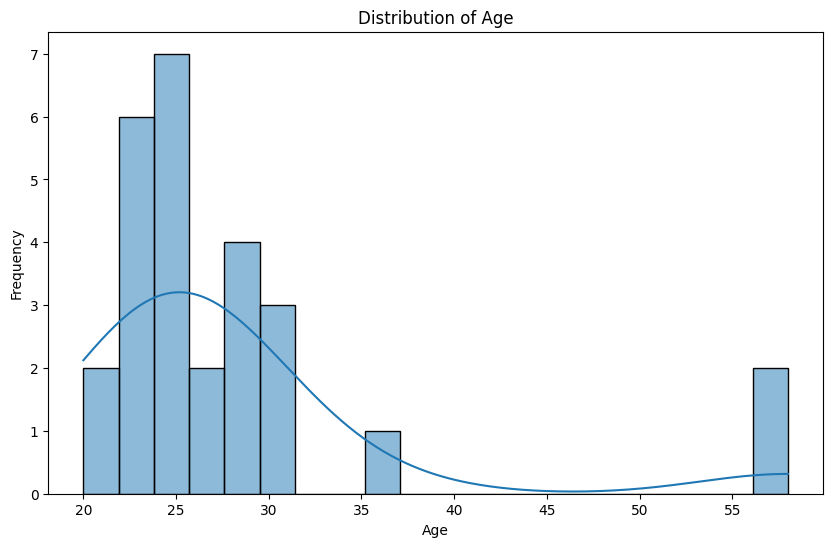

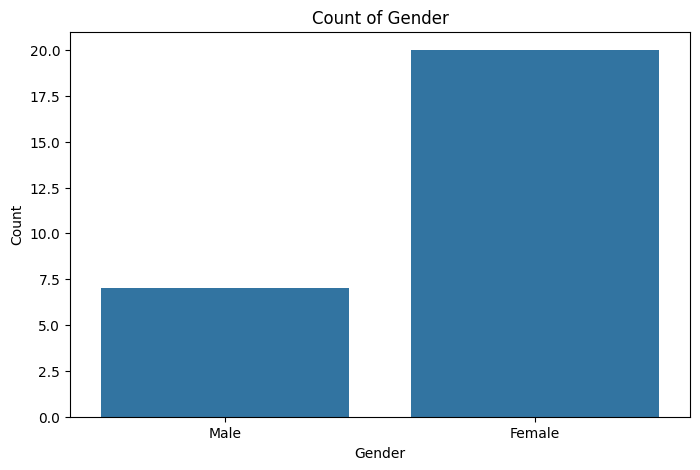

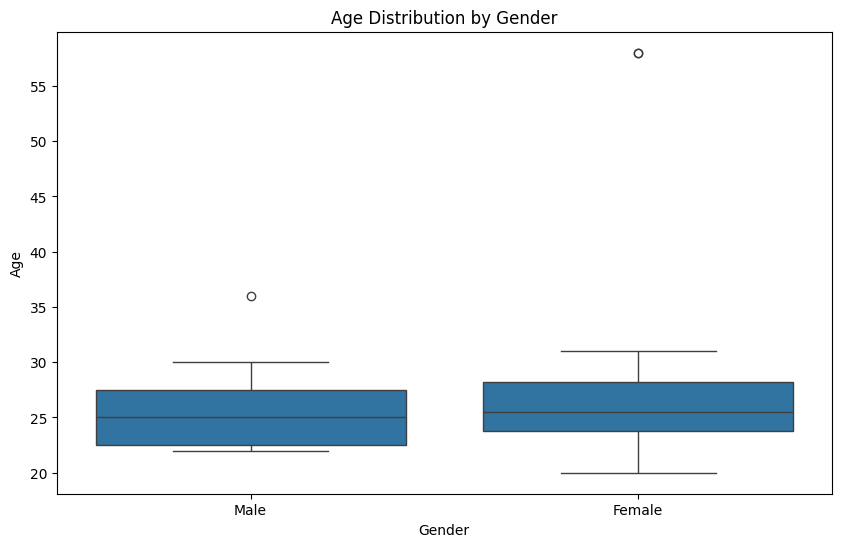

Not enough numeric columns to generate a correlation heatmap.
The histogram shows that the age distribution is slightly right-skewed, indicating a larger number of younger respondents.


In [51]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/data/spring2021_survey.csv"
df = pd.read_csv(url)

# Step 1: Inspect the dataset
print(f"Shape of the dataset: {df.shape}")
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Step 2: Summary statistics for numerical columns
numerical_summary = df[['7. My age']].describe()
print(numerical_summary)

# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

# Step 3: Data Visualization

# Histogram of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['7. My age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for 'gender'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='6. My gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Box plot for 'age' by 'gender'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='6. My gender', y='7. My age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Check for numeric columns before creating a correlation heatmap
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) > 1:  # Ensure there's more than one numeric column
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numeric columns to generate a correlation heatmap.")

# Conclusion (you can customize this based on your findings)
print("The histogram shows that the age distribution is slightly right-skewed, indicating a larger number of younger respondents.")
